In [18]:
from PIL import Image, ImageDraw, ImageFont
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

unicode_map = {codepoint: char for codepoint, char in pd.read_csv('../Datasets/unicode_translation.csv').values}

# This function takes in a filename of an image, and the labels in the string format given in a submission csv, and returns an image with the characters and predictions annotated.
def visualize_predictions(image_fn, labels):
    # Convert annotation string to array
    labels = np.array(labels.split(' ')).reshape(-1, 3)
    
    # Read image
    imsource = Image.open(image_fn).convert('RGBA')
    bbox_canvas = Image.new('RGBA', imsource.size)
    char_canvas = Image.new('RGBA', imsource.size)
    bbox_draw = ImageDraw.Draw(bbox_canvas) # Separate canvases for boxes and chars so a box doesn't cut off a character
    char_draw = ImageDraw.Draw(char_canvas)

    for codepoint, x, y in labels:
        x, y = int(x), int(y)
        char = unicode_map[codepoint] # Convert codepoint to actual unicode character

        # Draw bounding box around character, and unicode character next to it
        bbox_draw.rectangle((x-10, y-10, x+10, y+10), fill=(255, 0, 0, 255))
        fontsize = 50
        font = ImageFont.truetype('../Downloads/NotoSansCJKjp-Regular.otf', fontsize, encoding='utf-8')
        char_draw.text((x+25, y-fontsize*(3/4)), char, fill=(255, 0, 0, 255), font=font)

    imsource = Image.alpha_composite(Image.alpha_composite(imsource, bbox_canvas), char_canvas)
    imsource = imsource.convert("RGB") # Remove alpha for saving in jpg format.
    return np.asarray(imsource)

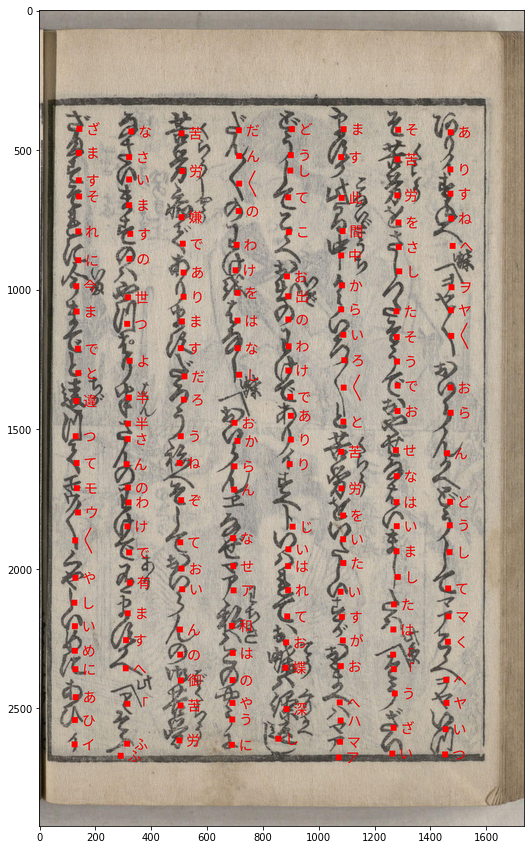

In [21]:
with open('CrossValidationSetPredictions.csv') as submission:
    submission_lines = submission.readlines()
    
image_id, labels = submission_lines[1].split(',')
image_path = os.path.join('../Datasets/train_images', image_id + '.jpg')
viz = visualize_predictions(image_path, labels)
plt.figure(figsize=(15, 15))
plt.imshow(viz, interpolation='lanczos')